# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=\frac{\pi}{4}$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Answer questions 1-4 with a desired orientation of $\theta = 0$

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [2]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [3]:
# we can simulate the robot but we need to provide a controller of the following form
def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """
    # here we do nothing and just return some non-zero control
    return 1. * np.ones([2,])




# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


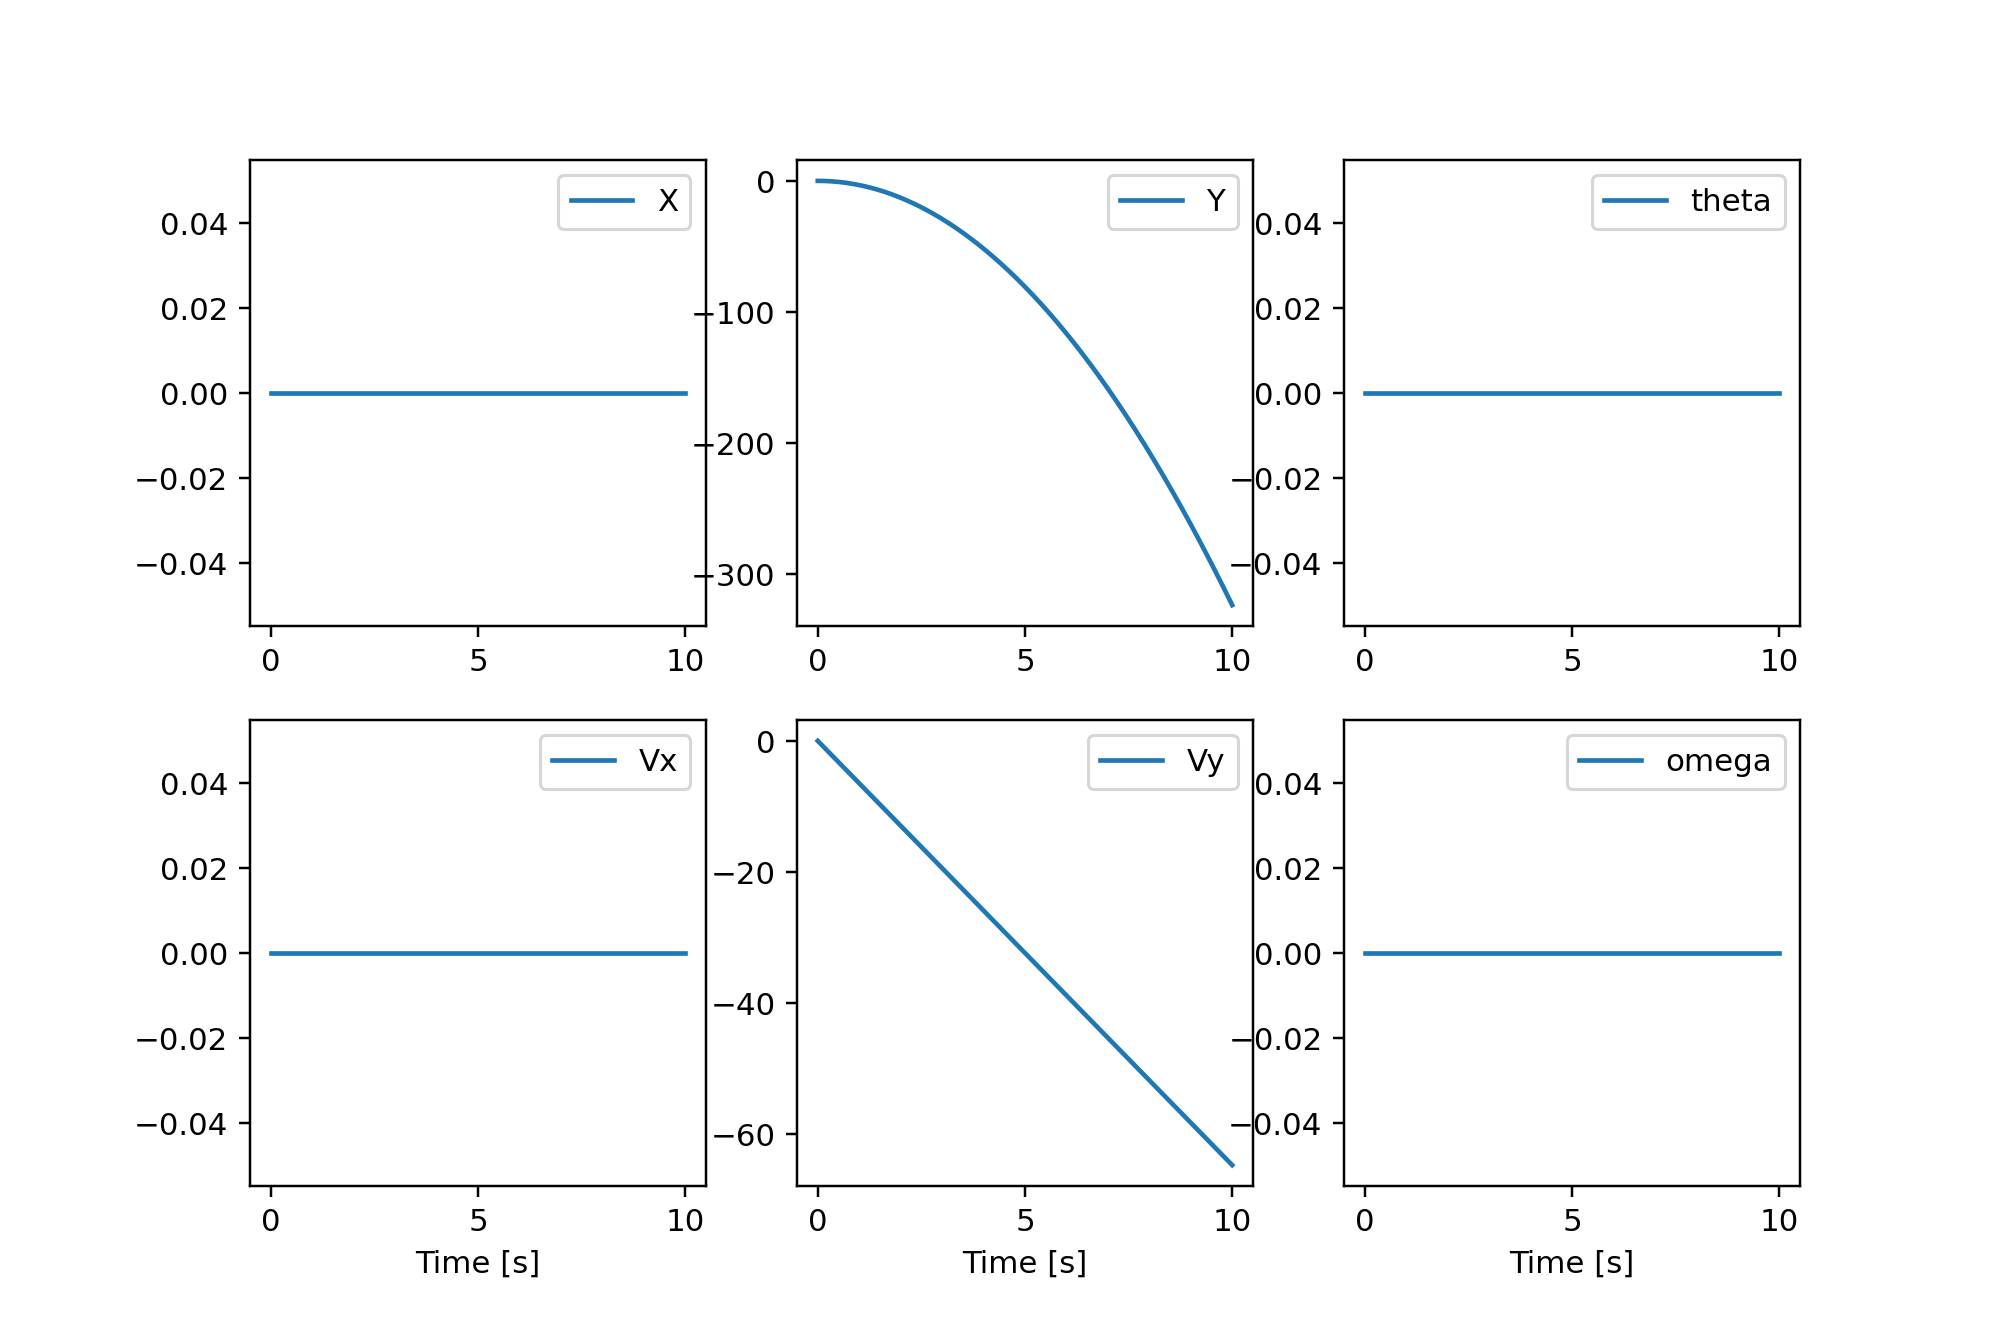

<IPython.core.display.Javascript object>


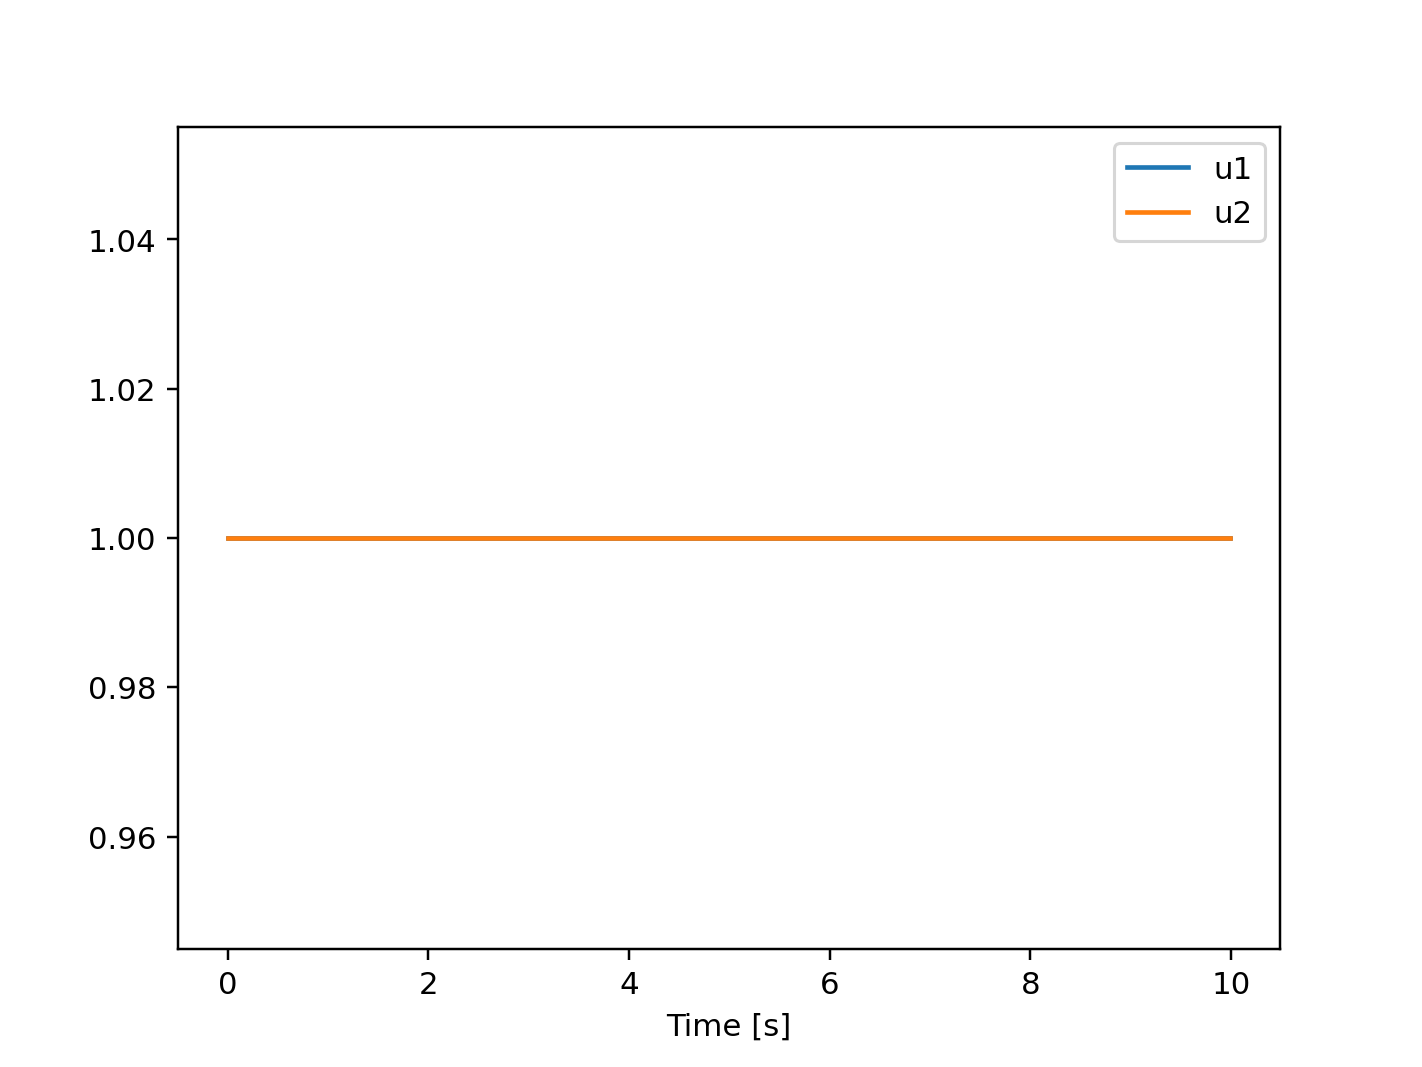

Text(0.5, 0, 'Time [s]')

In [4]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [5]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAALMdtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Ef9liIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhoQZvIVAmDgcDuo5PlWD03+vw7tYq99Z+y+b
HyReNFrxo3z2EA4QBJsEFaRxlAqjSg1ElkVWMl5YHFMWMPV44U8/r8e+gYHGjCeClaVZ8BH4FG6Z
WgkicRT6ihsKd1pWWQToCa1wYUa6WxZj1tesogdhxnWhP62FWa6UKhPzVpQlcC8xbElV4WjIcMip
SB2FwsyOe4PjiDFmgCYqvBesO45CMv+ngu8znmfi+LrtH5kvrAP7J2hRM2iwfoA4AKIAt0hER6PI
7h14tcniPY7lhh/LgQemh2YreOOPbS/io6bEKpktMzUsr2rIcv7gn+AW5ayX7+OPXSoWKwukxvdQ
aS6Ax9LzRsAlpc07Wwrg0XhByc9WuYLaUrgTT8vv7QrrzEcjXy6VhtKewskbi5hmxa7pmsTSJBv6
pFZz0TZh4HejY2uXzEVovxVhBJMd9z3rmdbr2p9lA/oGPYquiVhnwZNFUbP+K/G1Xm/ZMefz2Rv7
CC47TeZMcAbaQ/z534x6EjGFvDxd4V8WP9ng1nzHcZNPc/lRb8abVl0D9vzdSr0mzAIN1vlJ4ZAU
3lt4Svs00deGcavubXPZ3roUXg8AugCk/cGfl/0nl6rNoqQMI5686K3BK+otyA8jdEMd9yYWihiY
rlaiHH9BF/qILPy3LLjx63MeXCT7ibY2/XsxynnMa1UNTAAAAwAAAwAAAwAAE/htllAK04L2zu7U
XNPBnShcaoVlbwH/DhgdJyQ9/h4Y2MNP9xdKQTrfHmu1iExq43kcWUhWAlKpA44RwHPES4Q41lLR
qq3w0hu8pjWjtbhLApHVq/NMi4SlNU5ZLQl6FtY2kADxKeRA4LeAxd7/nMCp3L/A2C3un9GKmiNz
zwLCDz6+gf/Oso0Cd8H2+FEiGRU4Q7kyTeP/mZgeDcwDmFGGa8Ck76JbAnlyoxgPHSEz6FfjnShk
eBNm7QyN7wYhO4RqWiqSvmG8NhK8WQberrvtJpIanmbN2JiSAaogkgNt22Ks/+BWIA0kJ80SgFNI
qmcf9SOmf57XmzKVEgHydyHlkKAlC+9sgG2FltDMYAY8/ypsl/6qKpwloMdWFJjMqZD00/Pfrx8e
P4AAAAMAAAMAAAMAGQbY56Z3LJxyi5C24b05PSFB8Pk0ggohmIxcZhyilgKDRY8mlCp/iuUoeoz/
yeU2dJzfl2Dqpd/fcolWxRGaPa7J9D6Mqwvy2pn6BtL48Ght+eNPMMuOWR9dFcSoJPTYKBfRZZS5
kZOUk4t08pceA+TGETG2CqNdAILZJvQjdi2A+CtqX69eWO63QlDs3XG6AR6zYAte653OTO1Fr3a3
WPltDoREHvuNuniRW5wM3C7W6mK5TlUDRjJGkxNL0xOcseyx8CfZT94cbRH2LC4DJ2Mqrt1IQJT4
370zNPzyTg4x1yR5J4ivv3cNp8ZoV4H7ZZvnZQHPfY/1nXNkDVwinF8S1olPpsZCI3QFGj/rrp4N
tjcoPeb9Bub2uySu8+nciGjD7JxmQ5koVCZViqFIpzv+h3HFiGZUxV4n3fxe/47oCEf5nBK21GE6
SXlZ3WR0Bv2b+063mUuYno80lMoSuSL27N1JNWFFA0I865t6iF4AAAMAAAMAAAMAejX10lgbRGnW
uNWU2eFQf6ttm6wjR02QFEVYoUXUhHM/oE9u/6PpfJDTCNxTBtu0E6sxRoZhE7aiM/lrcWNL3E6M
eQ5LROdppp/dU6WCm/8z0fNtW/aDTnJ2cMrLpIbYUC+TVvltAoHXqq38aKrM2BkUt2kn/c6R7vma
EdnUUHo+3Vi1IWDGHHyRyC2bDCaiEjmztxolvy7U0tPWdKj6SriQFWmyA+YUPLdZ2kbyFUESK1jn
58Jppc/1JKtMhQ3KxV9/s49nooXyxlts7tP6NjQNJjav0o3Ln47WC6Pw6DSsjnn5GMNOWJfVWU12
F9onln+juoCLn6+LgsQWokyciD30SqAehM1quaZ9IYWTpvyfpZslOeY0keTsdk4ygRxpB3mCVSiZ
rY8rApFilPBbR0ZtEPyzBaFHF6Q/viXQ3yIxagul4V9XydhfohsIoyMsWx+wuRl7Ule2wDTzErvb
z85yeae97mjqQB7VjmzXKODuB7+5IMMTwAcSUOfJrSWeoyR7rcQgrC/mq7OiWbKSTr8aZAvnSfnN
cA8mupI+CLmaCkOQOwxFIUZkBfBTsW4m82KDL0+YgLH2jo35lwKR4GUpw0N8H7/wOqmXBlFGBXIw
FpdtjGoH92GfU92Al7KhtwcyR8O76B+E5ORDlNDEje6/9DQzjyKDQuWbgJ1btrVKMaQ9LmTXTkDP
MkrAc/tZwZarVn4JOnV4CvwZ41+yNGjBiI4u4xizc6P3cPtL6KqQquTumjRstyRjTJf07VbvJg0A
AAMAgohY0Yo6R1EDgfFSXAAAAwAAFVM/lotTu/2OScYran6A+Bh/wHUEzKny7qK3eavevyQ+kq18
VEZJsGqNsVL1kPnvvYm99WT3c+H9E6yScGD9x9hXGuXIYzH6Z3ASRJxvEMcNkvl9s5fNRZLFZD74
I5/ouvdwtSctkRyKlxwRruisbq096SM38Rp2r6fG2S7uj8i9aEVFQ2MU4CGyMm2BynI8yhCuFvE1
Ebj2uM5JDx82JGZqiM8TC

<IPython.core.display.Javascript object>


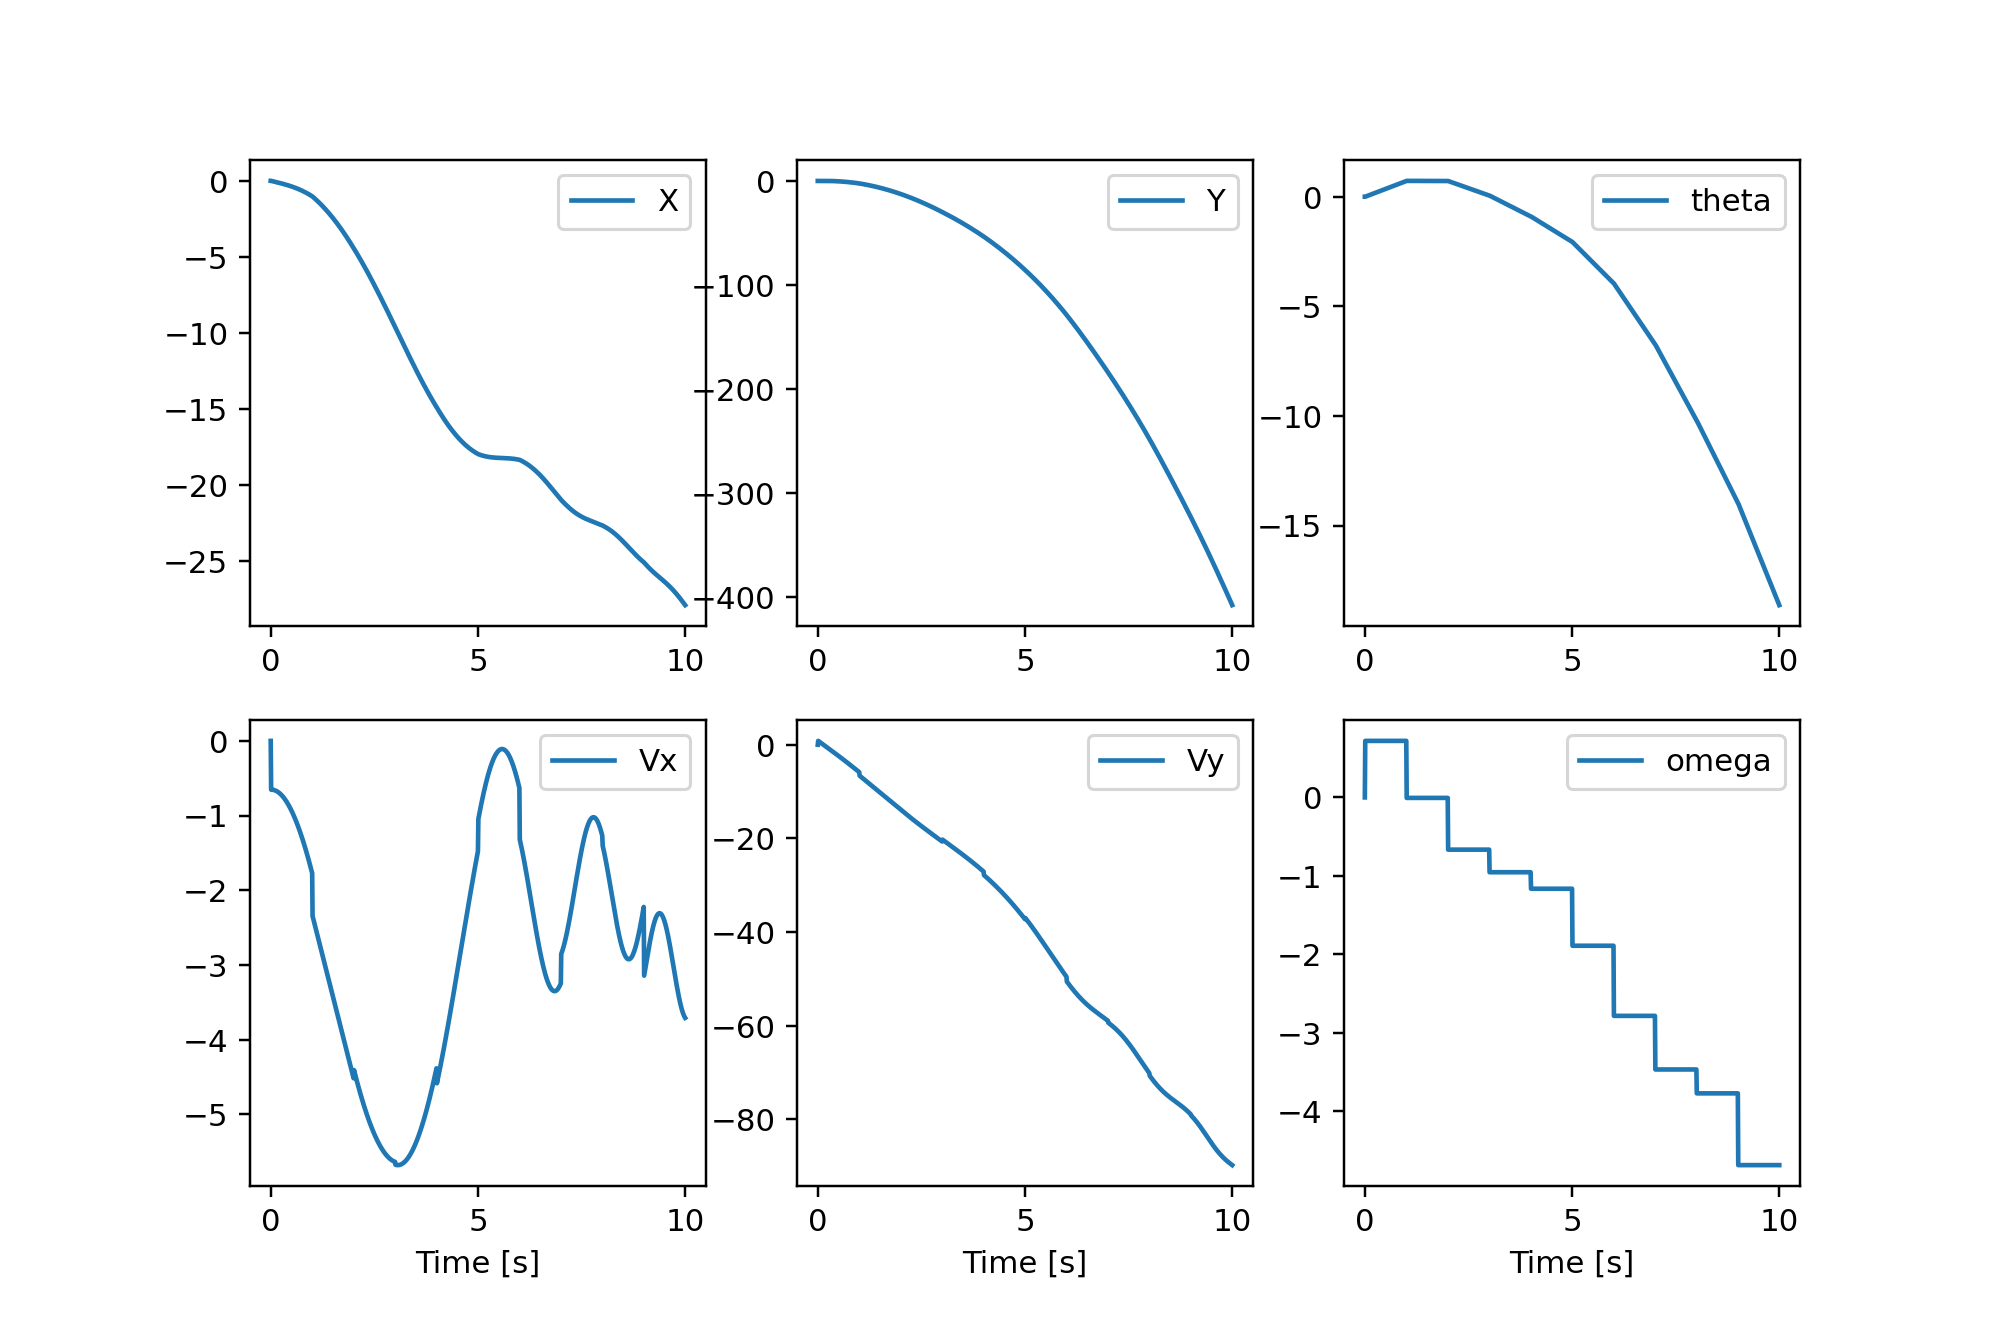

<IPython.core.display.Javascript object>


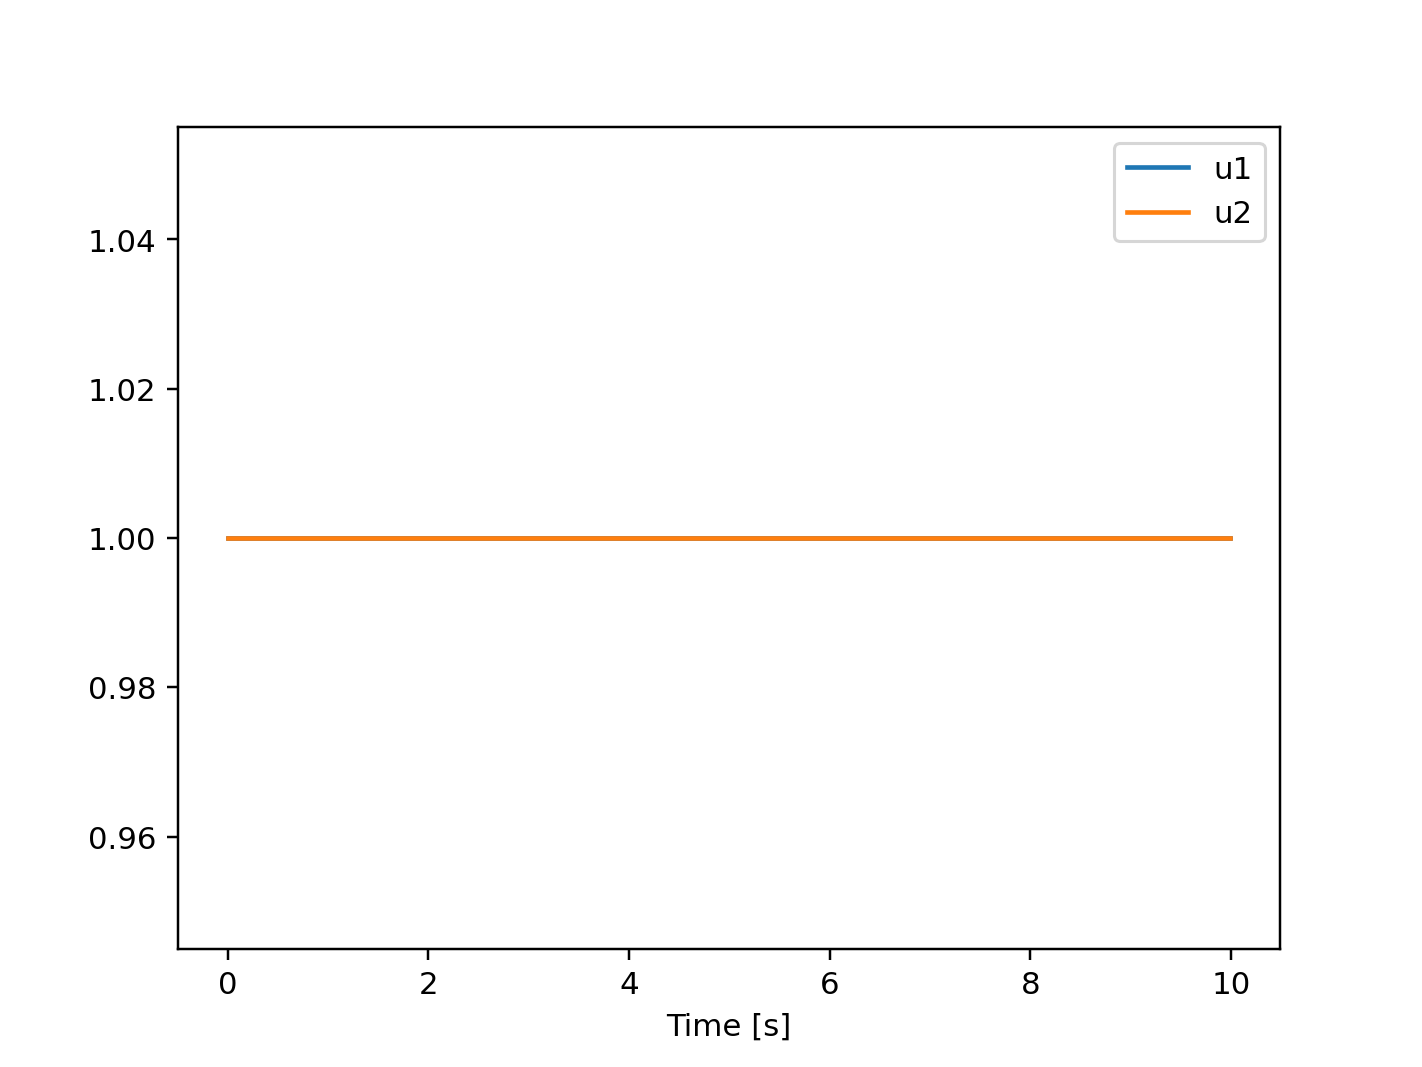

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAANQ9tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI0
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Eg9liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpSCdb46p2sQmNXG8jiykKNs5VIHHCOA54iXCH
Grmih6C+GkN3lMa0drcJcFI3WssFydnqVg+Vl1LJ1QIQUAOowFq6Kc88vv9z7ve1Qb4UBg6torKk
1rpmNtZ/T/Xe6+Ez+EjZHG90CyaEPZ7cVZXQZiNuptG93TEmvPNuisLgNZSWC1YVoTVd7eOdKGR4
E2btWF6qv3qENxSIo0iZFN4bCV4sg09Z1np+JTLGGMjd+iSAaogkgNq3Dqg/+BV+wa5J88frVKTF
qMf9SOmf57XmoKVXAHyeLjQYiwNOAu2QDbBzy6MBARUf5V2eFXoaFOMXBP+tjfPsHcmdVXsBA/qC
gGUSyBIAAN27uWYP++KoQCJEyEkgAfJLJEIAN+UwdoCChGREevryQcouQtuG9OT0hQcT5NIIKIZi
MXGYb5pYCg0WPJpQqh8aDeD1GO2TymzpOb8uwdVLuxnBiXNdwtZywzJpuZapes2MI34Hil8Wv3Ma
dG8RBqMxkINwdqd6WKIqDjCYhxsajHH/LNDv2xXUYRMbYMubZsgtkm9EHjAfBQvGPhk3u6mlnCH6
UZrsYab3zs2frewBYt6vbb5/3rwFX9vTkt0QJqDh38Z6wAAwn6/pLsDooWZEIokzsoDnvcyoFywy
dsk2CMEZpKmSkvPSfJZRJW6S3V4fYLJGKdPSbbssfcW/HHfFnAuccafB9cxDBNMa7GUdbIJI3EZH
H10pDl6mWf1/J9eCcw1t8Y5e+tyK7L5kWB8wlNr+b+v8kIxO83x1ioMVviWKcsC2GZUxV4n3fxe/
47oCFHd5tggN0Q0hzo1Y7RBjpDdooLTFzroNUe5G7U2vafI8IvvjaL2oGDNmNDkbpbfquD96QcAA
B1jn8jtX58gAAJK33DUCZtNACxV8lqEK+fjt0y72rdEWtGMvWALb3ytcXpn8EPENSAHa8ifPRWVO
E4aZ9C1f5LqPVRUXLM9/pwQ9IRislwl6w0Z/Mmjyi/r0t1DihZC+4O7DH5RrLqAokfN2eY6DTnJ3
UcqwcIbYUC+TVvltAoJWBZx8aKrM2BkUt2nX/L8GD0n6cVXD8QHQe3wcWLUhYMYcfG6BiVNUf8qF
ZwqQABLfl2ppaes6VFHsNW5mGq8CIN6tyjvRhQWnGxgBmAwU00uen045wcEQwFK+/4c6dsJkZ7Fw
MXfvyIQnMhF9IwqEhToDNOZQ+M06EzvqtzvRvDebMJjyEZYfYZK9aZLpR06I1++UtKCuiIZML2vE
UciYqDuMwy78IqbyKF/CSyDzHvnoRJXMB66YlUHeYPZZxI8kPKUbti1U1f+NKvHras4InZPpTfeD
6y7+BzHc6u0B3moyLVeP83InI9Luu3QzpQR25/tPE55fJfiAXZc4ELat9bR7R8nXOA5RNmomcWs5
a8ui6FKRmWk6QXoNDv/5xk4hz703yQ8ALIO2r88E6LLFgp5fZURbadGiSRYgQFICQTXTns/0E6ZW
x0CSp1JfagLV+gfHBKhrnHs4eUBcqbU1X2iLZqqAmDMVwSBx9jkZ3tvm7P3ptBV6lOSPG7AilKrW
Kw7W+/Q/8ksHEf3D34cdQQlV8npPZpwV3RCS2i29qA7HO4FPrI3A8eI3BnB7+IgV32SeWPGrOz6u
kUzzMqjPbZuQN8YoExJBbuhdDgP3f4/dLlvgTyRi7wAAAwJ3MS0/bW1Jjvs0AAADAAADAVc/OOCQ
60zVBDF+4px7VQ6v220xp0EuZyLzW03ORSDm/f2OygiZAeJ+PsCBE5f0800TemKNEDN/fw243BMR
b+jxtBRg7C+5YuxGGQncaQdYY/cxSAws/p1BUPvgjn+kY93SuSElT8d26Itmu6SsUBsnoDJnOAz0
vpH7aWHom+SvAbUaqjVOW

In [7]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)